# РК №1

## Вариант №2.
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# загрузка данных
data = pd.read_csv('BlackFriday.csv', sep=',')
# вывод первых 5 строк из датасета
data.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [22]:
data.shape

(537577, 12)

In [23]:
# Размер датасета

print('Всего строк: {}'.format(data.shape[0]))
print('Всего колонок: {}'.format(data.shape[1]))

Всего строк: 537577
Всего колонок: 12


In [24]:
# Список колонок с типами данных
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [25]:
# Проверим на наличие пустых значений

for col in data.columns:
    print('{} - {}'.format(col, data[data[col].isnull()].shape[0]))

User_ID - 0
Product_ID - 0
Gender - 0
Age - 0
Occupation - 0
City_Category - 0
Stay_In_Current_City_Years - 0
Marital_Status - 0
Product_Category_1 - 0
Product_Category_2 - 166986
Product_Category_3 - 373299
Purchase - 0


## Удаление строк, содержащих пустые значения

In [26]:
data_new_1 = data.dropna(axis=0, how='any')
(data.shape, data_new_1.shape)

((537577, 12), (164278, 12))

In [27]:
# Проверим на наличие пустых значений

for col in data_new_1.columns:
    print('{} - {}'.format(col, data_new_1[data_new_1[col].isnull()].shape[0]))

User_ID - 0
Product_ID - 0
Gender - 0
Age - 0
Occupation - 0
City_Category - 0
Stay_In_Current_City_Years - 0
Marital_Status - 0
Product_Category_1 - 0
Product_Category_2 - 0
Product_Category_3 - 0
Purchase - 0


## Основные статистические характеристки набора данных

In [28]:
data.describe()

User_ID    Occupation  Marital_Status  Product_Category_1  \
count  5.375770e+05  537577.00000   537577.000000       537577.000000   
mean   1.002992e+06       8.08271        0.408797            5.295546   
std    1.714393e+03       6.52412        0.491612            3.750701   
min    1.000001e+06       0.00000        0.000000            1.000000   
25%    1.001495e+06       2.00000        0.000000            1.000000   
50%    1.003031e+06       7.00000        0.000000            5.000000   
75%    1.004417e+06      14.00000        1.000000            8.000000   
max    1.006040e+06      20.00000        1.000000           18.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       370591.000000       164278.000000  537577.000000  
mean             9.842144           12.669840    9333.859853  
std              5.087259            4.124341    4981.022133  
min              2.000000            3.000000     185.000000  
25%              5.000000            9.000000    5866.000000  
50%              9.000000           14.000000    8062.000000  
75%             15.000000           16.000000   12073.000000  
max             18.000000           18.000000   23961.000000

## Визуальное исследование датасета
### Диаграмма рассеяния
Исследуем зависимость между Purchase и Age

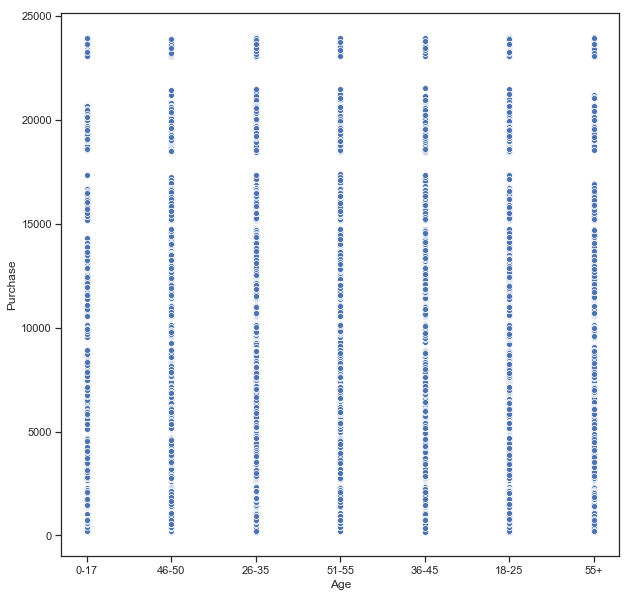

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='Age', y='Purchase', data=data_new_1)

In [30]:
cat_temp_data = data_new_1[['Age']]
from sklearn.impute import SimpleImputer

imp1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

data_imp1 = imp1.fit_transform(cat_temp_data)
cat_enc = pd.DataFrame({'c1':data_imp1.T[0]})
cat_enc.head()

c1
0   0-17
1  46-50
2  26-35
3  51-55
4  51-55

In [31]:
data_new_2 = pd.get_dummies(data_new_1, columns=['Age'])
data_new_2.head()

User_ID Product_ID Gender  Occupation City_Category  \
1   1000001  P00248942      F          10             A   
6   1000004  P00184942      M           7             B   
13  1000005  P00145042      M          20             A   
14  1000006  P00231342      F           9             A   
16  1000006   P0096642      F           9             A   

   Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
1                           2               0                   1   
6                           2               1                   1   
13                          1               1                   1   
14                          1               0                   5   
16                          1               0                   2   

    Product_Category_2  Product_Category_3  Purchase  Age_0-17  Age_18-25  \
1                  6.0                14.0     15200         1          0   
6                  8.0                17.0     19215         0          0   
13                 2.0                 5.0     15665         0          0   
14                 8.0                14.0      5378         0          0   
16                 3.0                 4.0     13055         0          0   

    Age_26-35  Age_36-45  Age_46-50  Age_51-55  Age_55+  
1           0          0          0          0        0  
6           0          0          1          0        0  
13          1          0          0          0        0  
14          0          0          0          1        0  
16          0          0          0          1        0

In [32]:
# Преобразовать категориальную переменную в фиктивные / индикаторные переменные
pd.get_dummies(cat_enc).head()

c1_0-17  c1_18-25  c1_26-35  c1_36-45  c1_46-50  c1_51-55  c1_55+
0        1         0         0         0         0         0       0
1        0         0         0         0         1         0       0
2        0         0         1         0         0         0       0
3        0         0         0         0         0         1       0
4        0         0         0         0         0         1       0

### Парные диаграммы

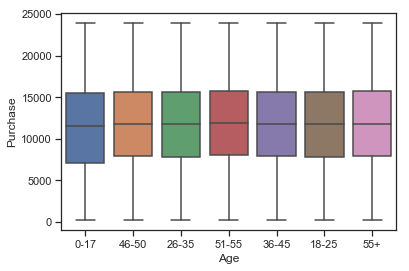

In [34]:
# Распределение параметра alcohol сгруппированные по quality.
sns.boxplot(x='Age', y='Purchase', data=data_new_1)

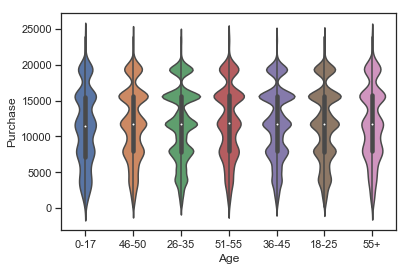

In [35]:
sns.violinplot(x='Age', y='Purchase', data=data_new_1)

## Информация о корреляции признаков

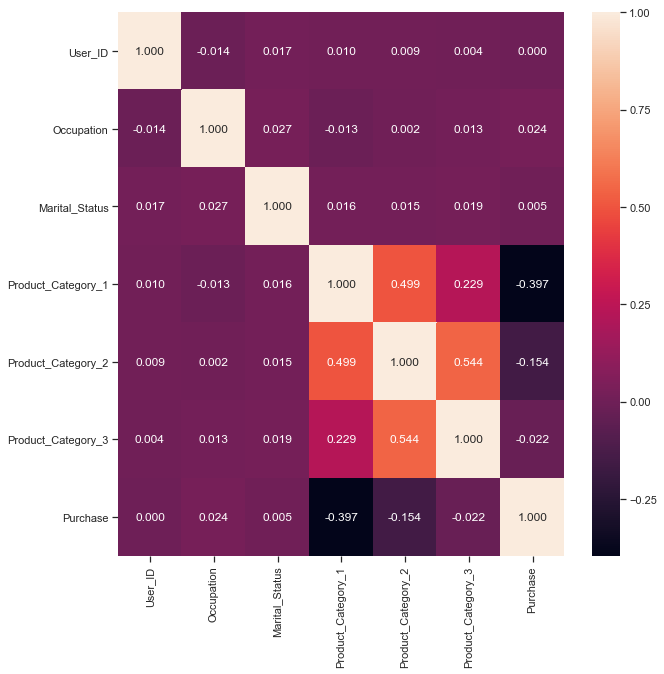

In [39]:
# Вывод значений в ячейках
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data_new_1.corr(), annot=True, fmt='.3f', ax=ax)

In [40]:
corr = data_new_1.corr()
m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.5).any()
raw = corr.loc[m, m]
raw

Product_Category_2  Product_Category_3
Product_Category_2            1.000000            0.543544
Product_Category_3            0.543544            1.000000